In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import scipy
from scipy import stats

from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## EDA: Time Series Graph

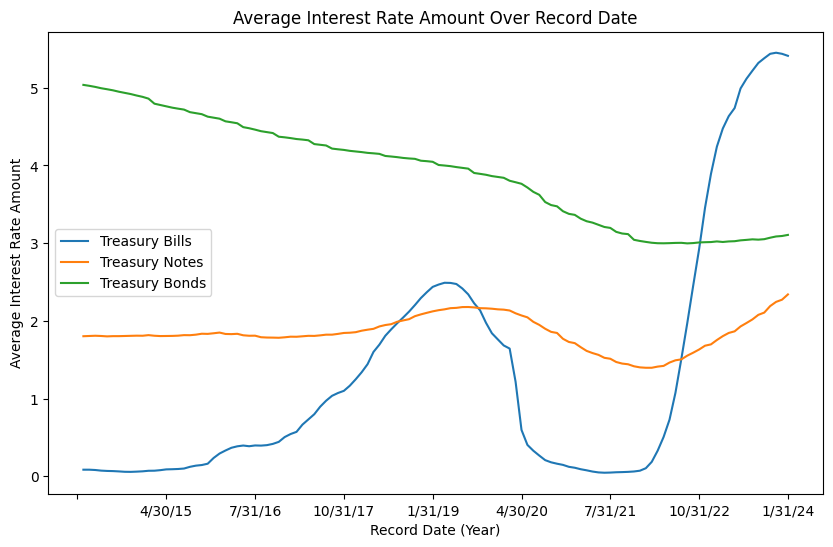

In [2]:
data = pd.read_csv('final_data.csv')

treasury_bills = data[data['Security Description'] == 'Treasury Bills']
treasury_notes = data[data['Security Description'] == 'Treasury Notes']
treasury_bonds = data[data['Security Description'] == 'Treasury Bonds']

# show average interest rate amount

plt.figure(figsize=(10, 6))

plt.plot(treasury_bills['Record Date'], treasury_bills['Average Interest Rate Amount'], label='Treasury Bills')
plt.plot(treasury_notes['Record Date'], treasury_notes['Average Interest Rate Amount'], label='Treasury Notes')
plt.plot(treasury_bonds['Record Date'], treasury_bonds['Average Interest Rate Amount'], label='Treasury Bonds')

# Customize the graph
plt.xlabel('Record Date (Year)')
plt.ylabel('Average Interest Rate Amount')
plt.title('Average Interest Rate Amount Over Record Date')
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.gca().invert_xaxis()
plt.show()

## EDA: PACF and ACF plots

<Figure size 1200x600 with 0 Axes>

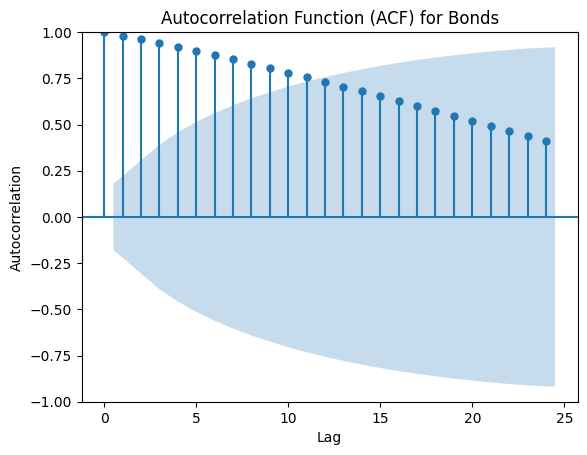

<Figure size 1200x600 with 0 Axes>

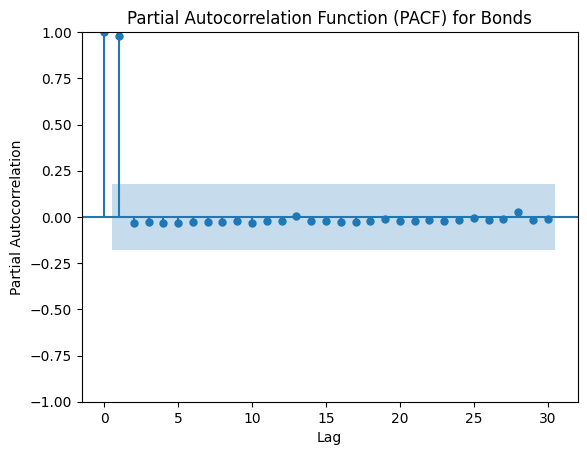

<Figure size 1200x600 with 0 Axes>

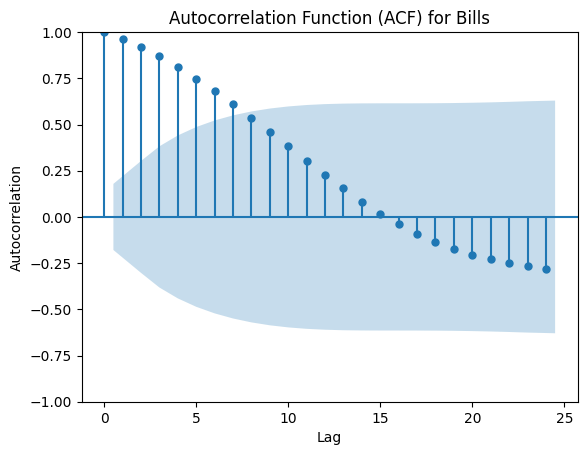

<Figure size 1200x600 with 0 Axes>

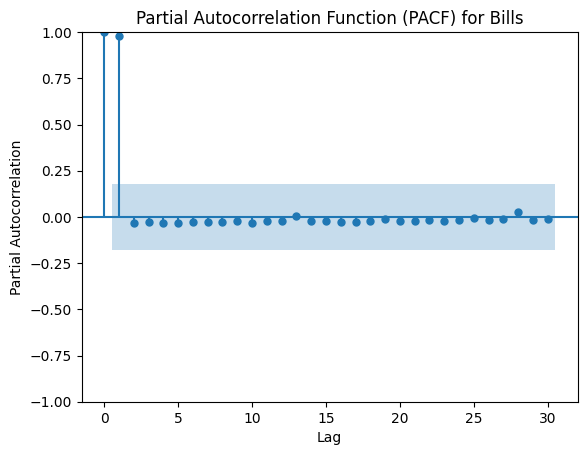

<Figure size 1200x600 with 0 Axes>

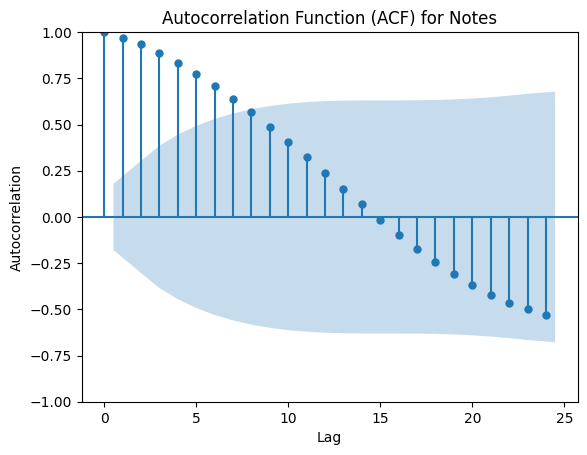

<Figure size 1200x600 with 0 Axes>

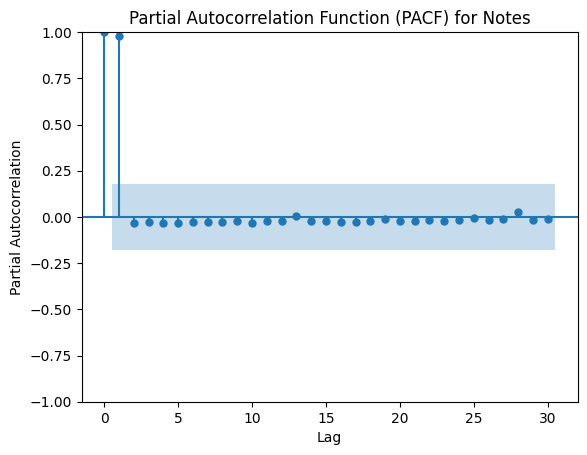

In [4]:
# bonds
bonds_bool = data['Security Description'] == 'Treasury Bonds'

bonds = data[bonds_bool]

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(bonds['Average Interest Rate Amount'], lags=24)
plt.title('Autocorrelation Function (ACF) for Bonds')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(bonds['Average Interest Rate Amount'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) for Bonds')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# bills
bills_bool = data['Security Description'] == 'Treasury Bills'

bills = data[bills_bool]

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(bills['Average Interest Rate Amount'], lags=24)
plt.title('Autocorrelation Function (ACF) for Bills')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(bonds['Average Interest Rate Amount'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) for Bills')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

notes_bool = data['Security Description'] == 'Treasury Notes'

notes = data[notes_bool]

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(notes['Average Interest Rate Amount'], lags=24)
plt.title('Autocorrelation Function (ACF) for Notes')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(bonds['Average Interest Rate Amount'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) for Notes')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

## Linear Regression: Bonds

In [5]:
# convert dates to datetime objects
data['Record Date'] = [datetime.strptime(date, "%m/%d/%y") for date in data['Record Date']]

# convert dates to ordinal values
data['Record Date'] = [date.toordinal() for date in data['Record Date']]

In [6]:
# create linear regression model for bonds
bonds_bool = data['Security Description'] == 'Treasury Bonds'

bonds = data[bonds_bool]

# convert to numpy arrays
X_bonds = np.array(bonds['Average Interest Rate Amount']).reshape(-1, 1)  # Dates
y_bonds = np.array(bonds['Record Date'])

# create linear model
model_bonds = LinearRegression()

# fit model to data
model_bonds.fit(X_bonds, y_bonds)

y_pred_bonds = model_bonds.predict(X_bonds)

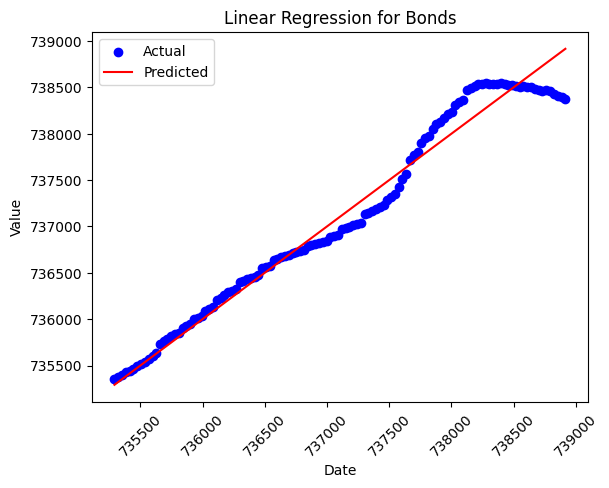

In [7]:
# create plot for bonds
plt.scatter(bonds['Record Date'], y_pred_bonds, color='blue', label='Actual')
plt.plot(bonds['Record Date'], y_bonds, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression for Bonds')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [8]:
# get coefficients for linear regression model
slope = model_bonds.coef_[0]
intercept = model_bonds.intercept_

print("slope=", slope)
print("intercept=", intercept)

slope= -1562.0080412678299
intercept= 743226.2327339469


In [9]:
# get significance level for bonds

X_bonds = sm.add_constant(X_bonds)

model_bonds2 = sm.OLS(y_bonds, X_bonds).fit()

print(model_bonds2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4261.
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.86e-94
Time:                        05:57:50   Log-Likelihood:                -788.72
No. Observations:                 120   AIC:                             1581.
Df Residuals:                     118   BIC:                             1587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.432e+05     95.132   7812.543      0.0

## Linear Regression: Bills

In [10]:
# create linear regression model for bills

bills_bool = data['Security Description'] == 'Treasury Bills'

bills = data[bills_bool]

# convert to numpy arrays
X_bills = np.array(bills['Average Interest Rate Amount']).reshape(-1, 1)  # Dates
y_bills = np.array(bills['Record Date'])

# create linear model
model_bills = LinearRegression()

# fit model to data
model_bills.fit(X_bills, y_bills)

y_pred_bills = model_bills.predict(X_bills)

In [11]:
# create plots for bills
plt.scatter(bonds['Record Date'], y_pred_bills, color='blue', label='Actual')
plt.plot(bonds['Record Date'], y_bills, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression for Bills')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [12]:
# get coefficients for linear regression model
slope = model_bills.coef_[0]
intercept = model_bills.intercept_

print("slope=", slope)
print("intercept=", intercept)

slope= 411.9029418992045
intercept= 736554.3110995991


In [13]:
# get significance level

X_bills = sm.add_constant(X_bills)

model_bill2 = sm.OLS(y_bills, X_bills).fit()

print(model_bill2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     72.12
Date:                Sun, 05 May 2024   Prob (F-statistic):           7.04e-14
Time:                        05:58:01   Log-Likelihood:                -976.94
No. Observations:                 120   AIC:                             1958.
Df Residuals:                     118   BIC:                             1963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.366e+05    100.186   7351.833      0.0

## Linear Regression: Notes

In [14]:
# create linear regression model for notes

notes_bool = data['Security Description'] == 'Treasury Notes'

notes = data[notes_bool]

# convert to numpy arrays
X_notes = np.array(notes['Average Interest Rate Amount']).reshape(-1, 1)  # Dates
y_notes = np.array(notes['Record Date'])

# create linear model
model_notes = LinearRegression()

# fit model to data
model_notes.fit(X_notes, y_notes)

y_pred_notes = model_notes.predict(X_notes)

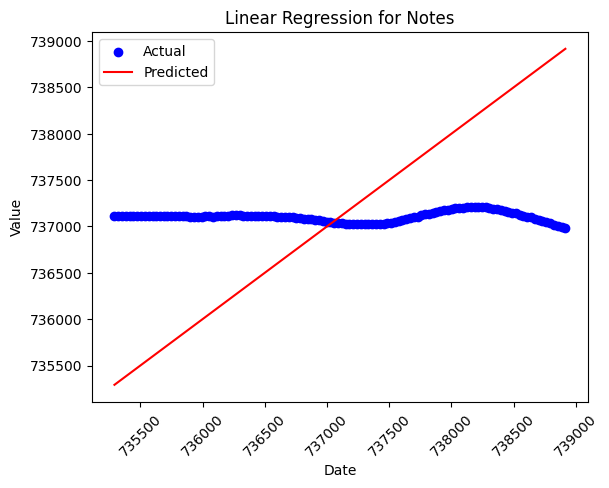

In [15]:
# create plot for notes
plt.scatter(bonds['Record Date'], y_pred_notes, color='blue', label='Actual')
plt.plot(bonds['Record Date'], y_notes, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression for Notes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [16]:
slope = model_notes.coef_[0]
intercept = model_notes.intercept_

print("slope=", slope)
print("intercept=", intercept)

slope= -245.5959776570476
intercept= 737557.0617203526


In [17]:
# get significance level

X_notes = sm.add_constant(X_notes)

model_notes2 = sm.OLS(y_notes, X_notes).fit()

print(model_notes2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2944
Date:                Sun, 05 May 2024   Prob (F-statistic):              0.588
Time:                        05:58:11   Log-Likelihood:                -1005.4
No. Observations:                 120   AIC:                             2015.
Df Residuals:                     118   BIC:                             2020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.376e+05    840.548    877.472      0.0

## ARIMA and SARIMA models

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Testing Mean Squared Error for Treasury Bonds (ARIMA): 0.00024398528276208626
Testing Mean Squared Error for Treasury Bonds (SARIMA): 0.00011890054718220223


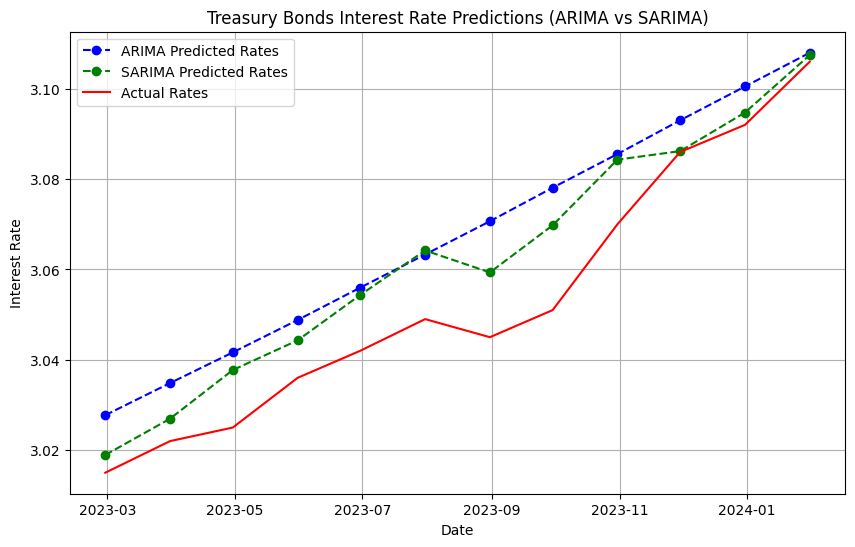

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Testing Mean Squared Error for Treasury Notes (ARIMA): 0.024049408780211615
Testing Mean Squared Error for Treasury Notes (SARIMA): 0.027436957259637833


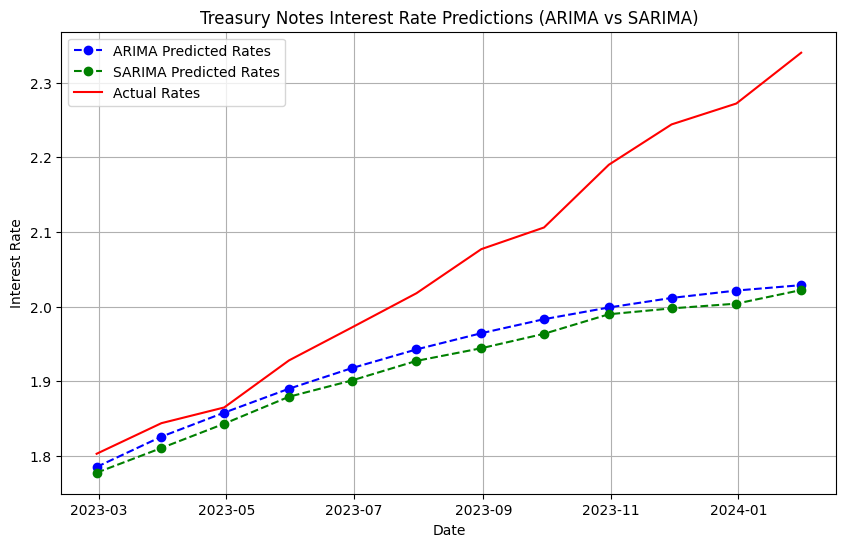

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Testing Mean Squared Error for Treasury Bills (ARIMA): 0.3666678312300958
Testing Mean Squared Error for Treasury Bills (SARIMA): 0.019509881704242362


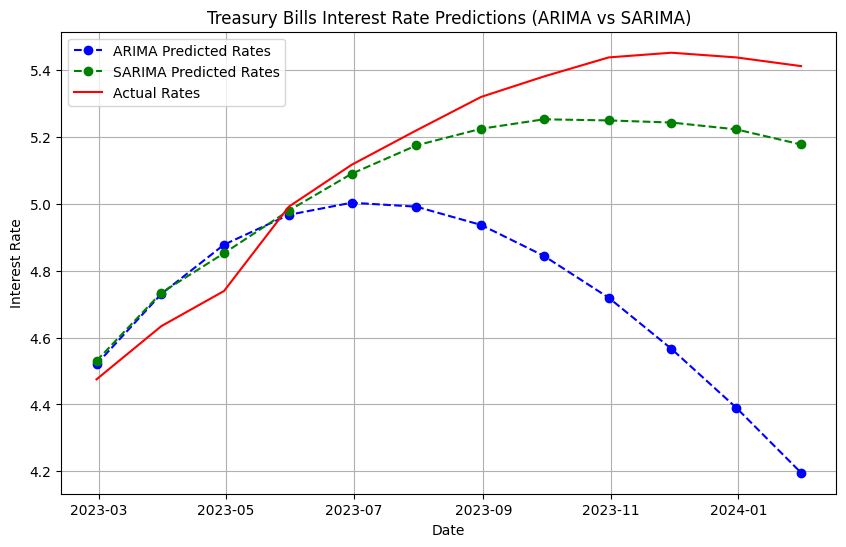

In [18]:
# Load your final_data DataFrame
final_data = pd.read_csv("final_data.csv")

# Convert 'Record Date' column to datetime type
final_data['Record Date'] = pd.to_datetime(final_data['Record Date'], format='%m/%d/%y')

# Sort the data by 'Record Date'
final_data = final_data.sort_values(by='Record Date')

# Iterate over each type of security to train and test ARIMA and SARIMA models
for security in final_data['Security Description'].unique():
    security_data = final_data[final_data['Security Description'] == security]

    # Splitting data into train and test sets
    train_size = int(len(security_data) * 0.90)
    train_data, test_data = security_data.iloc[0:train_size], security_data.iloc[train_size:]

    # Define ARIMA parameters
    p = 3  # Number of lag observations
    d = 0  # Number of differences
    q = 0  # Size of the moving average window

    # Train the ARIMA model
    arima_model = ARIMA(train_data['Average Interest Rate Amount'], order=(p, d, q))
    arima_model_fit = arima_model.fit()

    # Define SARIMA parameters
    order = (3, 0, 0)  # ARIMA order (p, d, q)
    seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, S)

    # Train the SARIMA model
    sarima_model = SARIMAX(train_data['Average Interest Rate Amount'], order=order, seasonal_order=seasonal_order)
    sarima_model_fit = sarima_model.fit()

    # Generate predictions for ARIMA model
    arima_predictions = arima_model_fit.forecast(steps=len(test_data))

    # Generate predictions for SARIMA model
    sarima_predictions = sarima_model_fit.forecast(steps=len(test_data))

    # True test values
    true_test_values = test_data['Average Interest Rate Amount'].values

    # Calculate mean squared error for ARIMA
    arima_MSE_error = mean_squared_error(true_test_values, arima_predictions)
    print(f'Testing Mean Squared Error for {security} (ARIMA):', arima_MSE_error)

    # Calculate mean squared error for SARIMA
    sarima_MSE_error = mean_squared_error(true_test_values, sarima_predictions)
    print(f'Testing Mean Squared Error for {security} (SARIMA):', sarima_MSE_error)

    # Visualize predicted vs. actual interest rates
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Record Date'], arima_predictions, color='blue', marker='o', linestyle='dashed', label='ARIMA Predicted Rates')
    plt.plot(test_data['Record Date'], sarima_predictions, color='green', marker='o', linestyle='dashed', label='SARIMA Predicted Rates')
    plt.plot(test_data['Record Date'], true_test_values, color='red', label='Actual Rates')
    plt.title(f'{security} Interest Rate Predictions (ARIMA vs SARIMA)')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Iterate over each type of security
for security in final_data['Security Description'].unique():
    security_data = final_data[final_data['Security Description'] == security]

    # Define ARIMA parameters
    p = 3  # Number of lag observations
    d = 0  # Number of differences
    q = 0  # Size of the moving average window

    # Train the ARIMA model
    arima_model = ARIMA(security_data['Average Interest Rate Amount'], order=(p, d, q))
    arima_model_fit = arima_model.fit()

    # Define SARIMA parameters
    order = (3, 0, 0)  # ARIMA order (p, d, q)
    seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, S)

    # Train the SARIMA model
    sarima_model = SARIMAX(security_data['Average Interest Rate Amount'], order=order, seasonal_order=seasonal_order)
    sarima_model_fit = sarima_model.fit()

    # Define the number of future periods to forecast
    forecast_horizon = 60  # Forecasting interest rates for the next 12 months

    # Generate forecasts for ARIMA model
    arima_forecast = arima_model_fit.forecast(steps=forecast_horizon)

    # Generate forecasts for SARIMA model
    sarima_forecast = sarima_model_fit.forecast(steps=forecast_horizon)

    # Visualize forecasted interest rates
    plt.figure(figsize=(10, 6))
    plt.plot(security_data['Record Date'], security_data['Average Interest Rate Amount'], color='blue', label='Historical Rates')
    plt.plot(pd.date_range(start=security_data['Record Date'].iloc[0], periods=len(security_data)+forecast_horizon, freq='M'), np.concatenate([security_data['Average Interest Rate Amount'].values, arima_forecast]), color='green', linestyle='dashed', label='ARIMA Forecasted Rates')
    plt.plot(pd.date_range(start=security_data['Record Date'].iloc[0], periods=len(security_data)+forecast_horizon, freq='M'), np.concatenate([security_data['Average Interest Rate Amount'].values, sarima_forecast]), color='purple', linestyle='dashed', label='SARIMA Forecasted Rates')
    plt.title(f'{security} Interest Rate Forecast (ARIMA vs SARIMA)')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

## SVR Model

In [ ]:
# Load your final_data DataFrame
final_data = pd.read_csv("final_data.csv")

# Convert 'Record Date' column to datetime type
final_data['Record Date'] = pd.to_datetime(final_data['Record Date'], format='%m/%d/%y')

# Sort the data by 'Record Date'
final_data = final_data.sort_values(by='Record Date')

# Iterate over each type of security to train and test SVR models
for security in final_data['Security Description'].unique():
    security_data = final_data[final_data['Security Description'] == security]

    # Splitting data into train and test sets
    train_size = int(len(security_data) * 0.90)
    train_data, test_data = security_data.iloc[0:train_size], security_data.iloc[train_size:]

    # Train the SVR model
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Reshape input arrays to 2D
    X_train = train_data[['Record Date']].values.reshape(-1, 1)
    y_train = train_data['Average Interest Rate Amount'].values.reshape(-1, 1)
    X_test = test_data[['Record Date']].values.reshape(-1, 1)

    scaled_X_train = scaler_X.fit_transform(X_train)
    scaled_y_train = scaler_y.fit_transform(y_train)

    svr_model = SVR(kernel='rbf')
    svr_model.fit(scaled_X_train, scaled_y_train.ravel())  # ravel to convert 2D array to 1D

    # Scale the test data
    scaled_X_test = scaler_X.transform(X_test)

    # Generate predictions for SVR model
    svr_predictions_scaled = svr_model.predict(scaled_X_test)

    # Inverse scaling to get actual predictions
    svr_predictions = scaler_y.inverse_transform(svr_predictions_scaled.reshape(-1, 1)).ravel()  # reshape back to 1D

    # True test values
    true_test_values = test_data['Average Interest Rate Amount'].values

    # Calculate mean squared error for SVR
    svr_MSE_error = mean_squared_error(true_test_values, svr_predictions)
    print(f'Testing Mean Squared Error for {security} (SVR):', svr_MSE_error)

    # Visualize predicted vs. actual interest rates using SVR
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Record Date'], svr_predictions, color='orange', marker='o', linestyle='dashed', label='SVR Predicted Rates')
    plt.plot(test_data['Record Date'], true_test_values, color='red', label='Actual Rates')
    plt.title(f'{security} Interest Rate Predictions (SVR)')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Define forecast horizon
    forecast_horizon = 60  # Forecasting interest rates for the next 60 periods

    # Train the SVR model with all available data
    X_all = security_data[['Record Date']].values.reshape(-1, 1)
    y_all = security_data['Average Interest Rate Amount'].values.reshape(-1, 1)

    scaled_X_all = scaler_X.transform(X_all)
    scaled_y_all = scaler_y.transform(y_all)

    svr_model_all = SVR(kernel='rbf')
    svr_model_all.fit(scaled_X_all, scaled_y_all.ravel())  # ravel to convert 2D array to 1D

    # Generate forecasts for SVR model
    future_dates = pd.date_range(start=security_data['Record Date'].iloc[-1], periods=forecast_horizon+1, freq='M')[1:]  # Exclude the current date
    scaled_future_dates = scaler_X.transform(future_dates.values.reshape(-1, 1))
    svr_forecasts_scaled = svr_model_all.predict(scaled_future_dates)
    svr_forecasts = scaler_y.inverse_transform(svr_forecasts_scaled.reshape(-1, 1)).ravel()  # reshape back to 1D

    # Visualize forecasted interest rates using SVR
    plt.figure(figsize=(10, 6))
    plt.plot(security_data['Record Date'], security_data['Average Interest Rate Amount'], color='blue', label='Historical Rates')
    plt.plot(future_dates, svr_forecasts, color='orange', linestyle='dashed', label='SVR Forecasted Rates')
    plt.title(f'{security} Interest Rate Forecast (SVR)')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    plt.legend()
    plt.grid(True)
    plt.show()